44100
4095.9996855891045
-4095.999685589104


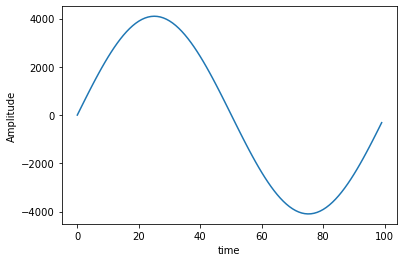

{'': 0.0,
 'A': 440.00745824565865,
 'B': 493.89167285382297,
 'C': 261.63,
 'D': 293.66974569918125,
 'E': 329.63314428399565,
 'F': 349.2341510465061,
 'G': 392.0020805232462,
 'a': 466.1716632541139,
 'c': 277.18732937722245,
 'd': 311.1322574981619,
 'f': 370.00069432367286,
 'g': 415.31173722644}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.io.wavfile import write

samplerate = 44100 #Frequecy in Hz

def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

# To get a 1 second long wave of frequency 440Hz
a_wave = get_wave(440, 1)

#wave features
print(len(a_wave)) # 44100
print(np.max(a_wave)) # 4096
print(np.min(a_wave)) # -40

plt.plot(a_wave[0:int(44100/440)])
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 261.63 #Frequency of Note C4
    
    note_freqs = {octave[i]: base_freq * pow(2,(i/12)) for i in range(len(octave))}        
    note_freqs[''] = 0.0 # silent note
    
    return note_freqs

# To get the piano note's frequencies
note_freqs = get_piano_notes()
pprint(note_freqs)

def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() # Function that we made earlier
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

music_notes = 'C-C-G-G-A-A-G--F-F-E-E-D-D-C--G-G-F-F-E-E-D--G-G-F-F-E-E-D--C-C-G-G-A-A-G--F-F-E-E-D-D-C'
data = get_song_data(music_notes)

data = data * (25600/np.max(data)) # Adjusting the Amplitude (Optional)
write('twinkle-twinkle.wav', samplerate, data.astype(np.int16))